In [ ]:
import os
import zipfile
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Car/Detection.v1-cardd.yolov8-obb.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Car')


In [ ]:
# Verify the files
print('Unzipped files:')
!ls '/content/drive/MyDrive/Car'

Unzipped files:
Detection.v1-cardd.yolov8-obb.zip  last_trial.ipynb  test  train  valid


In [ ]:
# Install the ultralytics library
!pip install ultralytics

In [ ]:
# Create the data.yaml file
data_yaml_content = """
train: /content/drive/MyDrive/Car/train
val: /content/drive/MyDrive/Car/test

# Classes
names:
  0: crack
  1: crash
  2: dent
  3: dislocated part
  4: glass shatter
  5: lamp broken
  6: no part
  7: rub
  8: scratch
  9: tire flat
"""

In [ ]:
# Write to a file
with open('/content/drive/MyDrive/Car/config.yaml', 'w') as f:
    f.write(data_yaml_content)

In [ ]:
from ultralytics import YOLO
# Initialize YOLOv8 model (use a pre-trained model or initialize a new one)

model = YOLO('yolov8s.pt')  # Replace with 'yolov8m.pt', 'yolov8l.pt', etc., if needed

# Train the model
model.train(
    data='/content/drive/MyDrive/Car/config.yaml',          # Path to the dataset YAML file
    epochs=20,                 # Number of training epochs
    imgsz=640,                 # Image size
    optimizer='SGD',           # Optimizer (e.g., SGD, Adam)
    lr0=0.01,                  # Initial learning rate
    lrf=0.1,                   # Final learning rate
    momentum=0.937,            # Momentum
    weight_decay=0.0005        # Weight decay
    )

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Car/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

train: Scanning /content/drive/MyDrive/Car/train/labels... 7000 images, 235 backgrounds, 955 corrupt: 100%|██████████| 7000/7000 [02:31<00:00, 46.27it/s] 

train: WARNING ⚠️ /content/drive/MyDrive/Car/train/images/000006_jpg.rf.46291f0a57b8e68874c7c9f261374341.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1571]
train: WARNING ⚠️ /content/drive/MyDrive/Car/train/images/000006_jpg.rf.d3fe823551af3bca362036b55f9f03c1.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3126]
train: WARNING ⚠️ /content/drive/MyDrive/Car/train/images/000024_jpg.rf.c0cad3377425dac32bf27b3236935e54.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1184]
train: WARNING ⚠️ /content/drive/MyDrive/Car/train/images/000025_jpg.rf.696e6fbc1c56dccffc44740ffedf42c9.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.053]
train: WARNING ⚠️ /content/drive/MyDrive/Car/train/images/000034_jpg.rf.057d8e4820f759f2862fbc825447a0b2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0181]
train: WAR

train: New cache created: /content/drive/MyDrive/Car/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Car/test/labels... 1000 images, 34 backgrounds, 133 corrupt: 100%|██████████| 1000/1000 [00:15<00:00, 66.36it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Car/test/images/000083_jpg.rf.b76e439ad4fa00c2b247acafb01a6efd.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0308]
val: WARNING ⚠️ /content/drive/MyDrive/Car/test/images/000178_jpg.rf.73f501e13c874f49a4c4e33464c6930d.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.149      1.2345]
val: WARNING ⚠️ /content/drive/MyDrive/Car/test/images/000208_jpg.rf.9233c64768d48eb641c636ed68b80678.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0126]
val: WARNING ⚠️ /content/drive/MyDrive/Car/test/images/000251_jpg.rf.66ab5bb43dd06269f30196ddd7aa3249.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0244      1.4506]
val: WARNING ⚠️ /content/drive/MyDrive/Car/test/images/000264_jpg.rf.7dadec05948eb7e12f09f73af35e5500.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1547   

val: New cache created: /content/drive/MyDrive/Car/test/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.32G      1.978      3.654      2.076         84        640: 100%|██████████| 378/378 [03:05<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:16<00:00,  1.72it/s]

                   all        867       1892      0.379      0.231      0.221      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.22G      1.866      2.711      1.915         60        640: 100%|██████████| 378/378 [02:56<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.04it/s]


                   all        867       1892      0.502      0.236      0.227      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.34G      1.898      2.722      1.942         70        640: 100%|██████████| 378/378 [02:59<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:10<00:00,  2.63it/s]


                   all        867       1892      0.286      0.262      0.212      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       4.2G      1.968      2.847      2.017         64        640: 100%|██████████| 378/378 [02:57<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]


                   all        867       1892      0.349      0.186      0.178     0.0945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.19G      1.925      2.781      1.995         71        640: 100%|██████████| 378/378 [02:55<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:10<00:00,  2.57it/s]


                   all        867       1892      0.399      0.263      0.262      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.22G      1.884      2.685      1.965         63        640: 100%|██████████| 378/378 [02:53<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.02it/s]


                   all        867       1892      0.307       0.31      0.267      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.18G      1.864      2.615      1.951         61        640: 100%|██████████| 378/378 [02:51<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:12<00:00,  2.28it/s]


                   all        867       1892      0.282      0.277      0.253       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.19G      1.836      2.523      1.927         56        640: 100%|██████████| 378/378 [02:55<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:10<00:00,  2.59it/s]


                   all        867       1892      0.342      0.335      0.318      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.18G      1.792       2.43       1.89         47        640: 100%|██████████| 378/378 [02:52<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]


                   all        867       1892      0.454      0.324      0.346      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.22G      1.773      2.361      1.864         67        640: 100%|██████████| 378/378 [02:55<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:10<00:00,  2.70it/s]


                   all        867       1892      0.342       0.36      0.344      0.196
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.18G      1.843      2.346       2.02         31        640: 100%|██████████| 378/378 [02:44<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:12<00:00,  2.21it/s]


                   all        867       1892      0.387      0.392      0.366      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.22G      1.795       2.22       1.98         24        640: 100%|██████████| 378/378 [02:42<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.04it/s]


                   all        867       1892      0.403      0.379       0.37       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.19G      1.759      2.134       1.95         23        640: 100%|██████████| 378/378 [02:39<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:10<00:00,  2.73it/s]


                   all        867       1892      0.461      0.437      0.407       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       4.2G      1.724      2.032      1.917         19        640: 100%|██████████| 378/378 [02:39<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.05it/s]


                   all        867       1892       0.45      0.454      0.409      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.18G      1.696      1.964      1.893         28        640: 100%|██████████| 378/378 [02:39<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:12<00:00,  2.33it/s]


                   all        867       1892      0.507      0.446      0.437      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.19G      1.664      1.868      1.859         25        640: 100%|██████████| 378/378 [02:36<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.08it/s]


                   all        867       1892      0.453      0.496       0.45      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.16G      1.631      1.801      1.826         32        640: 100%|██████████| 378/378 [02:34<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:11<00:00,  2.42it/s]


                   all        867       1892      0.531      0.487      0.466      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.19G      1.593      1.697      1.794         27        640: 100%|██████████| 378/378 [02:38<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:11<00:00,  2.37it/s]


                   all        867       1892       0.53      0.474       0.47      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       4.2G      1.551      1.612      1.751         25        640: 100%|██████████| 378/378 [02:33<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:12<00:00,  2.19it/s]

                   all        867       1892      0.556      0.515      0.519      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.18G      1.522      1.537      1.722         29        640: 100%|██████████| 378/378 [02:37<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  2.93it/s]


                   all        867       1892      0.568      0.512      0.505      0.301

20 epochs completed in 1.008 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]


                   all        867       1892      0.558      0.513      0.519        0.3
                 crack        166        224      0.519      0.219       0.22     0.0816
                 crash         22         22      0.492      0.818      0.735      0.296
                  dent        343        486      0.536       0.43      0.446      0.214
       dislocated part        124        143      0.374      0.287      0.268      0.112
         glass shatter         96        107      0.899      0.749      0.846       0.65
           lamp broken        114        118      0.646      0.697      0.701      0.455
               no part         70         80      0.506      0.463       0.44      0.198
                   rub         70        100      0.403       0.14      0.194     0.0804
               scratch        325        582      0.434      0.418        0.4      0.195
             tire flat         30         30      0.773      0.909      0.943      0.724
Speed: 0.3ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8736ac93f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [ ]:
import shutil

# Path to the folder you want to zip
folder_path = 'runs'
# Path where you want to save the zip file
zip_path = 'runs.zip'

shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)

'/content/runs.zip'

In [ ]:
from google.colab import files

# Download the zip file
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


image 1/1 /content/drive/MyDrive/Car/valid/images/000015_jpg.rf.d01785bbd5b6678430c64b312511fe84.jpg: 448x640 3 scratchs, 93.4ms
Speed: 1.6ms preprocess, 93.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


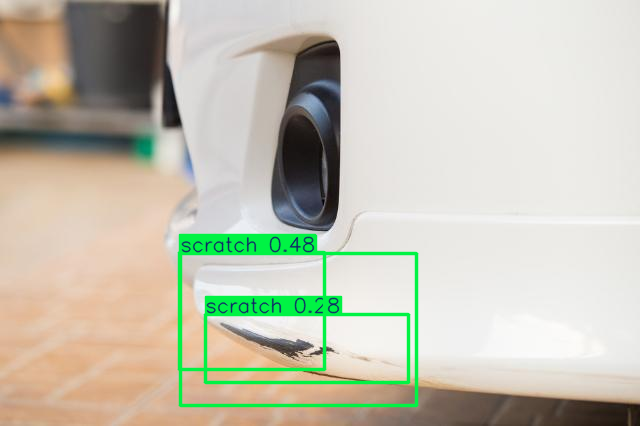

-1

In [ ]:
import cv2
from ultralytics import YOLO

img_pth = "/content/drive/MyDrive/Car/valid/images/000015_jpg.rf.d01785bbd5b6678430c64b312511fe84.jpg"
model = YOLO("/content/runs/detect/train3/weights/best.pt")
results = model(source=img_pth)
res_plotted = results[0].plot()
from google.colab.patches import cv2_imshow
cv2_imshow(res_plotted)
cv2.waitKey(0)


image 1/1 /content/drive/MyDrive/Car/valid/images/000022_jpg.rf.9626599578019be3cb9b30d901959fb5.jpg: 448x640 1 dent, 2 scratchs, 13.5ms
Speed: 1.7ms preprocess, 13.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


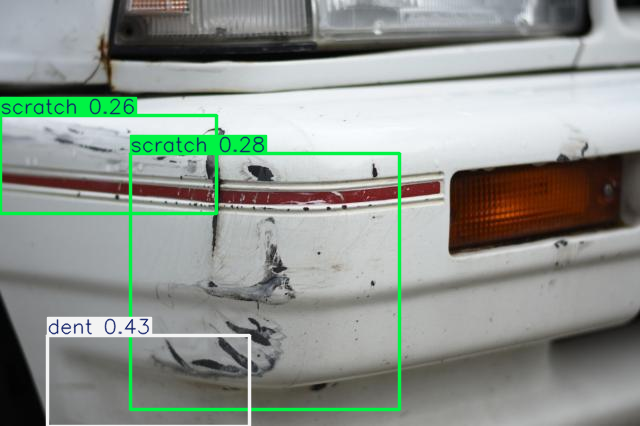

-1

In [ ]:
import cv2
from ultralytics import YOLO

img_pth = "/content/drive/MyDrive/Car/valid/images/000022_jpg.rf.9626599578019be3cb9b30d901959fb5.jpg"
model = YOLO("/content/runs/detect/train3/weights/best.pt")
results = model(source=img_pth)
res_plotted = results[0].plot()
from google.colab.patches import cv2_imshow
cv2_imshow(res_plotted)
cv2.waitKey(0)


image 1/1 /content/drive/MyDrive/Car/valid/images/000063_jpg.rf.a8556c210725f37df7a9db5278f62358.jpg: 448x640 1 dent, 1 lamp broken, 1 scratch, 13.5ms
Speed: 1.3ms preprocess, 13.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


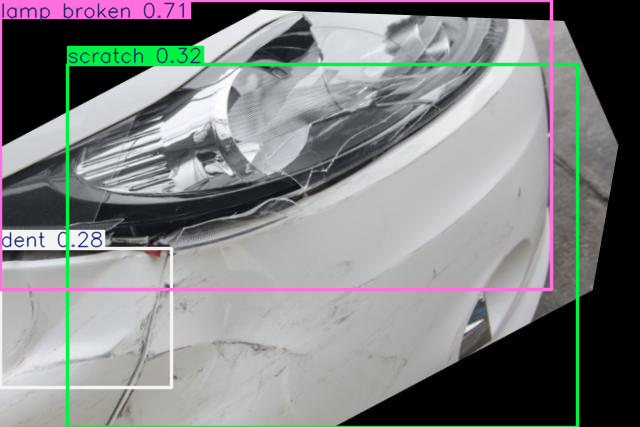

-1

In [ ]:
import cv2
from ultralytics import YOLO

img_pth = "/content/drive/MyDrive/Car/valid/images/000063_jpg.rf.a8556c210725f37df7a9db5278f62358.jpg"
model = YOLO("/content/runs/detect/train3/weights/best.pt")
results = model(source=img_pth)
res_plotted = results[0].plot()
from google.colab.patches import cv2_imshow
cv2_imshow(res_plotted)
cv2.waitKey(0)


image 1/1 /content/drive/MyDrive/Car/valid/images/000227_jpg.rf.d3bf730184d89f5e7547262ade909cbe.jpg: 448x640 1 glass shatter, 14.7ms
Speed: 1.7ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


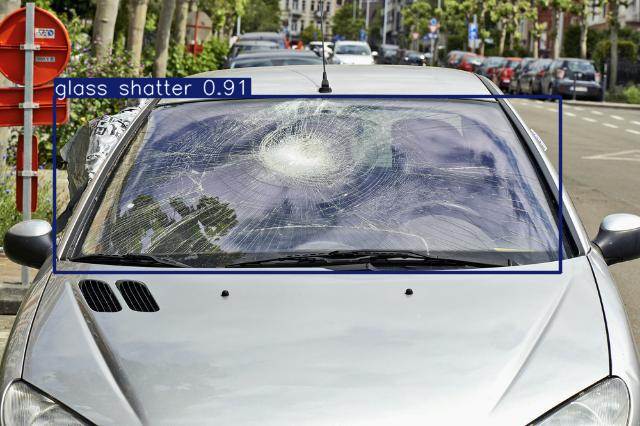

-1

In [ ]:
import cv2
from ultralytics import YOLO

img_pth = "/content/drive/MyDrive/Car/valid/images/000227_jpg.rf.d3bf730184d89f5e7547262ade909cbe.jpg"
model = YOLO("/content/runs/detect/train3/weights/best.pt")
results = model(source=img_pth)
res_plotted = results[0].plot()
from google.colab.patches import cv2_imshow
cv2_imshow(res_plotted)
cv2.waitKey(0)